## Esercitazione 8  del    23 Aprile 2024


## Condizionamento del problema della soluzione di un sistema lineare

# Esercizio 1
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma infinito senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1) e risolverlo usando il metodo solve del modulo linalg di Scipy.
- perturbare il vettore dei termini noti della quantità
- 
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0
\end{array}
\right ]
$$
- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [37]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import matplotlib.pyplot as plt
from SolveTriangular import *
import sys, os
sys.path.append(os.path.abspath('../Scheletri'))

# Step 2: Import the functions or classes from Schel_FULL
import Schel_FULL as sf

x = np.arange(1.0, 7.0, 1.0)

vander = np.vander(x, increasing=True)

mycond = npl.norm(npl.inv(vander), ord = np.inf)*npl.norm(vander, ord = np.inf)
cond = npl.cond(vander, p=np.inf)

print("My cond = ", mycond)
print("npl cond = ", cond)

b = np.sum(vander, axis= 1)

sol = spl.solve(vander, b)
print(sol)

bpert = b.copy()
bpert[0] += 0.25

sol_pert = spl.solve(vander, bpert)

print(sol_pert)

# Calcolo dell'errore relativo sul termine noto
delta_b = bpert - b
rel_error_b = npl.norm(delta_b, np.inf) / npl.norm(b, np.inf)
print("Errore relativo sul termine noto:", rel_error_b)

# Calcolo dell'errore relativo sulla soluzione
exact_sol = np.ones(6)  # Il vettore soluzione esatta è [1, 1, 1, 1, 1, 1]
rel_error_sol = npl.norm(sol_pert - exact_sol, np.inf) / npl.norm(exact_sol, np.inf)
print("Errore relativo sulla soluzione:", rel_error_sol)


My cond =  1204321.0666666436
npl cond =  1204321.0666666436
[1. 1. 1. 1. 1. 1.]
[ 2.5        -1.175       2.20833333  0.67708333  1.04166667  0.99791667]
Errore relativo sul termine noto: 2.6792412388811488e-05
Errore relativo sulla soluzione: 2.175000000001827


## Esercizio 2
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [38]:
A = np.array([
    [6, 63, 662.2],
    [63, 662.2, 6967.8],
    [662.2, 6967.8, 73393.5664]
])

b = np.array([1.1, 2.33, 1.7])

x = spl.solve(A,b)

print("Soluzione esatta: ",x)

a = np.zeros_like(A)
a[0, 0] += 0.01

Apert = A.copy()
Apert += a

xpert = spl.solve(Apert,b)

print("Soluzione perturbata: ",xpert)

err_rel_A = npl.norm(Apert-A, np.inf)/npl.norm(A, np.inf)
err_rel_x = npl.norm(xpert - x, np.inf)/npl.norm(x, np.inf)

print("Errore relativo sui dati: ", err_rel_A)
print("Errore relativo sulla soluzione: ", err_rel_x)

Soluzione esatta:  [136422.33746479 -25999.49954686   1237.44419611]
Soluzione perturbata:  [67.09867276 -9.66739506  0.3124175 ]
Errore relativo sui dati:  1.2342088165597937e-07
Errore relativo sulla soluzione:  0.9995081547933965


## Esercizio 3
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

In [39]:
H = spl.hilbert(4)

b = np.ones(4)

x = spl.solve(H,b)


delta = 0.01 * np.array([1,-1,1,-1])

bpert = b + delta


xpert = spl.solve(H,bpert)



err_rel_b = npl.norm(bpert - b, np.inf)/npl.norm(b, np.inf)
err_rel_x = npl.norm(xpert - x, np.inf)/npl.norm(x, np.inf)

print("Errore relativo sui dati: ", err_rel_b)
print("Errore relativo sulla soluzione: ", err_rel_x)


Errore relativo sui dati:  0.010000000000000009
Errore relativo sulla soluzione:  0.7566666666666719


## Metodi diretti per la soluzione numerica di un sistema lineare

## Nota 1.
La funzione *scipy.linalg.lu(A)*  , presa in input una matrice A a rango massimo, restituisce in output le matrici $P^T$,L,U,  della fattorizzazione di LU della matrice A in maniera tale che PA=LU (restituisce la matrice di permutazione trasposta)

## Nota 2
La funzione *scipy.linalg.cholesky(a, lower=True)*, presa in input una matrice simmetrica e definta positiva restituisce in output la matrice L triangolare inferiore tale che $A=L \cdot L^T$. Se la matrice in input non è definita positiva, restituisce un errore.

## Nota 3
La funzione *scipy.linalg.qr(a)*, presa in input una matrice A (nxn)  a rango massimo, restituisce in output le matrici Q (ortogonale di dimensione nxn) ed una matrice R (nxn) triangolare superiore tale che $A=Q \cdot R$

## Esercizio 4
- si implementi una function LUsolve(P,A,L,U,b) che risolve il sistema lineare Ax=b nel caso di fattorizzazione $PA = LU$ assegnata,
combinando i metodi di risoluzione in avanti ed all'indietro  implementati nel file SolveTriangular.py.
- si testi sulla matrice A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]]) con termine noto b scelto in maniera tale che la soluzione esatta del sistema lineare sia il vettore formato da tutti 1.

In [40]:
def LUsolve(P,A,L,U,b):
    pb=np.dot(P,b)
    y,flag=Lsolve(L,pb)
    if flag == 0:
         x,flag=Usolve(U,y)
    else:
        return [],flag

    return x,flag

In [41]:
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])

b = np.sum(A, 1)

PT, L, U = spl.lu(A)
P = PT.T.copy()

x, flag = sf.LUsolve(P,L,U,b)

print(x)

[[1.]
 [1.]
 [1.]
 [1.]]


## Esercizio 5
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

In [42]:
def solve_nsis(A,B):
    PT, L, U = spl.lu(A)
    sol_matrix = np.zeros_like(B)
    for j in range(B.shape[1]):
        PT, L, U = spl.lu(A)
        P = PT.T.copy()
        x, flag = sf.LUsolve(P, L, U, B[:, j])
        sol_matrix[:, j] = x.reshape(B.shape[1],)
    return sol_matrix

A = np.array([
    [3,5,7],
    [2,3,4],
    [5,9,11]
])

A1 = np.array([
    [1,2,3,4],
    [2,-4,6,8],
    [-1,-2,-3,-1],
    [5,7,0,1]
])

print(npl.inv(A))
print(solve_nsis(A, np.eye(A.shape[1])))


[[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
[[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]


## Esercizio 6
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


In [43]:
PT,L_1,U_1=spl.lu(A1)
P=PT.T.copy()
deterA2=np.prod(np.diag(U_1))*np.linalg.det(P)
#In realtà bisognerebbe risalire al numero di scambi effettuati s dall'algoritmo di Gauss con pivoting e calcolare det(P)=(-1)**s,
#ma mi interessa solo sapere il risultato teorico e quindi potete tranquillamente usare la funzione np.linalg.det per calcolare det(P)
print("determinante sfruttando fattorizzazione LU",deterA2,"determinante sfruttando la funzione np.linalg.det ", np.linalg.det(A1))

determinante sfruttando fattorizzazione LU -359.9999999999999 determinante sfruttando la funzione np.linalg.det  -359.9999999999997


## Esercizio 7
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con
$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema
con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

NB: per il calcolo della matrice di Hankel utilizzare la function 

def Hankel(n):

    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

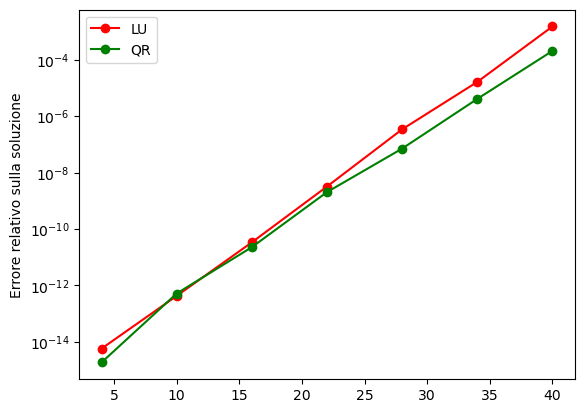

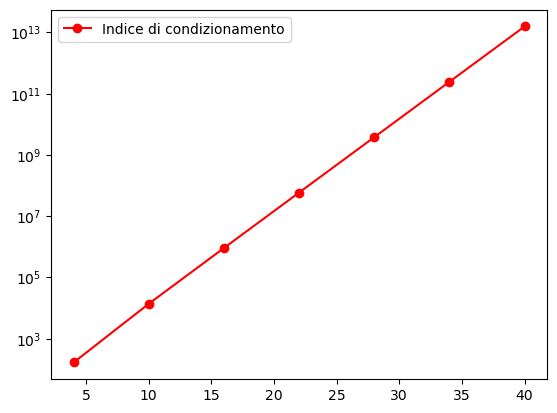

In [44]:
def Hankel(n):

    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

indCond=[]
err_rel_lu=[]
err_rel_qr=[]


for n in range(4,41,6):
    H = Hankel(n)
    indCond.append(npl.cond(H))
    xesatta = np.ones((n,1))
    b = np.sum(H, 1)
    Q,R = spl.qr(H)
    PT, L, U = spl.lu(H)
    P = PT.T.copy()
    x, flag = sf.LUsolve(P,L,U,b)

    err_rel_lu.append(npl.norm(x-xesatta, 2)/ npl.norm(xesatta,2))

    y = Q.T@b
    x_qr, flag = Usolve(R,y)
    err_rel_qr.append(npl.norm(x_qr-xesatta, 2)/npl.norm(xesatta,2))


plt.semilogy(range(4,41,6), err_rel_lu, 'ro-', range(4,41,6), err_rel_qr, 'go-')
plt.legend(['LU','QR'])
plt.ylabel('Errore relativo sulla soluzione')
plt.show()
plt.semilogy(range(4,41,6),indCond,'ro-')
plt.legend(['Indice di condizionamento'])

## Esercizio 8

Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?

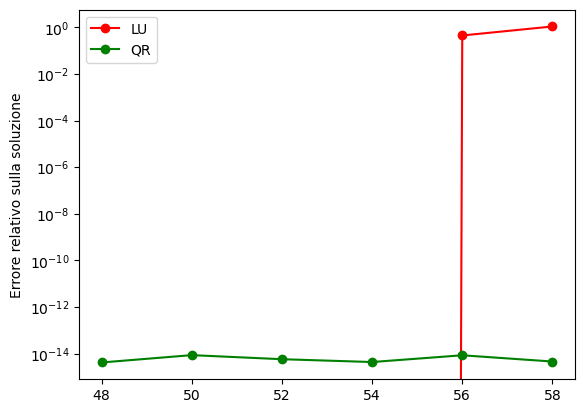

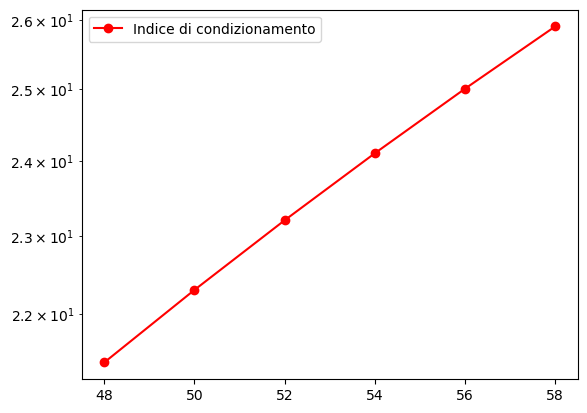

In [45]:
def matrix(n):
    matrix = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            if i == j or j == n-1:
                matrix[i,j] = 1
            elif i > j:
                matrix[i,j] = -1
            else: 
                matrix[i,j] = 0
    return matrix


indCond=[]
err_rel_lu=[]
err_rel_qr=[]


for n in range(48,59,2):
    M = matrix(n)
    indCond.append(npl.cond(M,2))
    xesatta = np.ones((n,1))
    b = np.sum(M, 1)
    Q,R = spl.qr(M)
    PT, L, U = spl.lu(M)
    P = PT.T.copy()
    x, flag = sf.LUsolve(P,L,U,b)

    err_rel_lu.append(npl.norm(x-xesatta, 2)/ npl.norm(xesatta,2))

    y = Q.T@b
    x_qr, flag = Usolve(R,y)
    err_rel_qr.append(npl.norm(x_qr-xesatta, 2)/npl.norm(xesatta,2))


plt.semilogy(range(48,59,2), err_rel_lu, 'ro-', range(48,59,2), err_rel_qr, 'go-')
plt.legend(['LU','QR'])
plt.ylabel('Errore relativo sulla soluzione')
plt.show()
plt.semilogy(range(48,59,2),indCond,'ro-')
plt.legend(['Indice di condizionamento'])

## Metodi iterativi di Jacobi, Guass-Seidel e Gausseidel_SOR per la soluzione numerica di un sistema lineare

## Esercizio 9
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei sistemi lineare Ax=b, dove 
- A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=500 e x0=np.zeros(A.shape[0]

raggio spettrale jacobi 0.5586853131416272
raggio spettrale Gauss-Seidel  0.31311214554257477
sol jacobi=
  [[1.]
 [1.]
 [1.]] 
 it  35
sol gauss= 
 [[ 1.52459017]
 [-0.90163935]
 [ 0.93442623]] 
 it  16


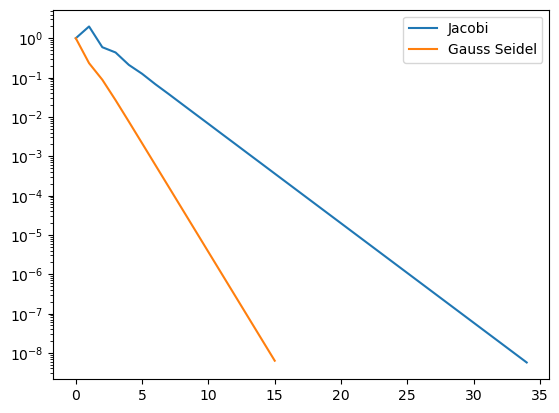

In [46]:
A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
#A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
#A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

toll = 1e-8
it_max = 500
n=A.shape[0]
x0 =np.zeros(A.shape[0]).reshape(n,1)
b = np.sum(A, 1).reshape(n,1)

x_jac, num_it_jac, err_vec_jac = sf.jacobi(A,b,x0,toll, it_max)

x_gauss, num_it_gauss, err_vec_gauss = sf.gauss_seidel(A,b,x0,toll,it_max)

print("sol jacobi=\n ",x_jac,"\n it ",num_it_jac)

print("sol gauss= \n",x_gauss,"\n it ",num_it_gauss)

plt.semilogy(np.arange(num_it_jac),err_vec_jac)
plt.semilogy(np.arange(num_it_gauss),err_vec_gauss)
plt.legend(["Jacobi ", "Gauss Seidel"])
plt.show()




## Esercizio 10
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.

In [47]:
def creaPoisson(n):
    #costruire una matrice di Poisson
    d=np.ones((n))*4
    e=-np.ones((n-1,))
    f=-np.ones((n-3,))
    A=np.diag(d)+np.diag(e,-1)+np.diag(e,1)+np.diag(f,-3)+np.diag(f,3)
    return A

raggio spettrale jacobi 0.8451732757464308
raggio spettrale Gauss-Seidel  2.071787712109766
raggio spettrale Gauss-Seidel SOR  0.593969922942925


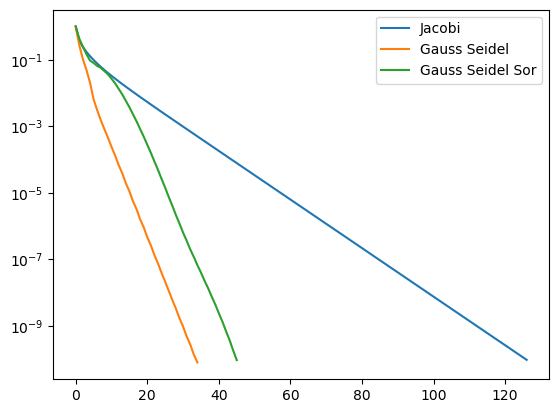

In [48]:
P = creaPoisson(10)
b = np.sum(P, 1).reshape(10,1)
toll = 1e-10
x0 = np.zeros(10).reshape(10,1)
nmax = 1000
omega = 1.5

x_jac, num_it_jac, err_vec_jac = sf.jacobi(P, b,x0, toll , nmax)

x_gs, num_it_gs, err_vec_gs = sf.gauss_seidel(P, b,x0, toll , nmax)

x_gssor, num_it_gssor, err_vec_gssor = sf.gauss_seidel_sor(P, b,x0, toll , nmax, omega)

plt.semilogy(range(num_it_jac), err_vec_jac)
plt.semilogy(range(num_it_gs), err_vec_gs)
plt.semilogy(range(num_it_gssor), err_vec_gssor)

plt.legend(['Jacobi','Gauss Seidel','Gauss Seidel Sor'])